<h1>Projeto de Análise de Dados Públicos.</h1>
<br>
Foco nos sálarios dos servidores públicos de São José dos Campos. Dados disponíveis no site <a href='http://servicos2.sjc.sp.gov.br/servicos/portal_da_transparencia/salarios.aspx'> Portal da Transparência.</a>
Este projeto foi realizado por João Pedro Filipini, Raphael Ribeira e Vinicius de Sousa.

In [2]:
#Importando as biblotecas.

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import numpy as np
plt.style.use('ggplot')

In [3]:
#Mudança do enconde para leitura do arquivo.
salarios = pd.read_csv('salarios.txt', sep = ';', encoding='latin-1')

In [4]:
#Criação da coluna com o total recebido por cada servidor.
salarios['TOTAL'] =  salarios[['REMUNERAÇÃO DO MÊS', 'VERBA EVENTUAL']].sum(axis=1)

In [5]:
#Organizando a tabela para que o total recebido apareça do maior para o menor.
salarios.sort_values('TOTAL', axis=0, inplace = True, na_position = 'first', ascending=False)

In [6]:
# Dados estruturados.
salarios

,ANO,MÊS,MATRÍCULA,NOME,CARGO,FUNÇÃO GRATIFICADA,TEMPO DE SERVIÇO (ANOS),REMUNERAÇÃO DO MÊS,VERBA EVENTUAL,TOTAL
2007,2019,5,304718/1,MARCOS JACQUES DE MORAES,PROCURADOR,MONITOR,23,28678.03,5607.03,34285.06
860,2019,5,246114/1,RAQUEL DE ALVARENGA,MÉDICO 40H,NaN,27,23451.41,10560.68,34012.09
2237,2019,5,315159/1,PATRICIA LOBODA FRONZAGLIA,PROCURADOR,NaN,22,26361.57,5607.03,31968.60
3,2019,5,41571/1,JOAO FRIGGI NETO,PROCURADOR I,NaN,45,22444.33,8182.33,30626.66
726,2019,5,238022/1,KARLA MARIA FALCE GARCIA,MÉDICO 24H,NaN,28,18816.93,11745.24,30562.17
3118,2019,5,387273/1,GABRIELA ABRAMIDES,PROCURADOR,SUPERVISOR 19C,18,23877.07,5607.03,29484.10
3303,2019,5,397171/1,RONALDO JOSE DE ANDRADE,PROCURADOR,SUPERVISOR 19C,18,23862.07,5607.03,29469.10
521,2019,5,225346/1,MARIA ILMA NOGUEIRA ANTHES,MÉDICO 24H,NaN,29,18021.66,11060.88,29082.54
2,2019,5,33021/1,JOSE ROBERTO CORREA,PROCURADOR I,NaN,46,21074.32,8004.23,29078.55
1,2019,5,22208/1,LUIZ CARLOS TEIXEIRA,PROCURADOR I,NaN,50,21074.32,8004.23,29078.55


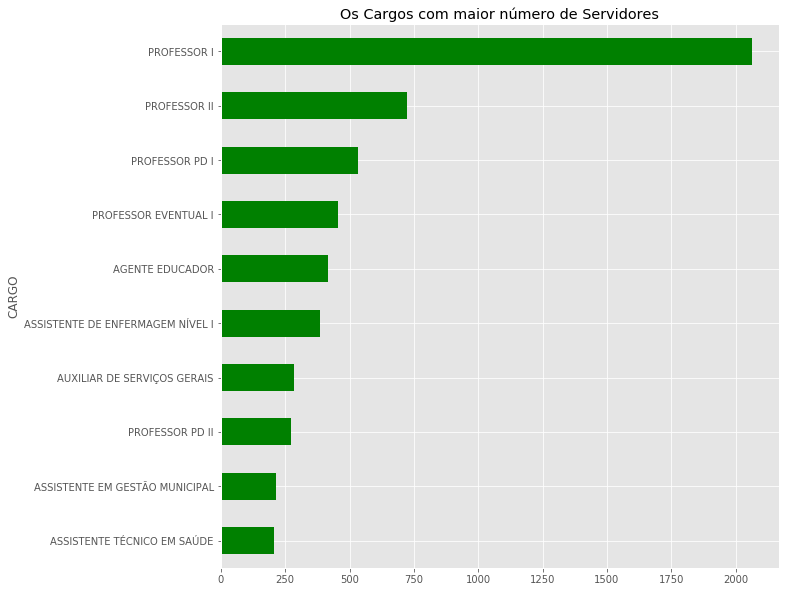

In [7]:
#Criação de um gráfico de barras com informações sobre os cargos com maior número de servidores.

salarios.groupby('CARGO').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10), color = 'green')

plt.title('Os Cargos com maior número de Servidores')
plt.show()

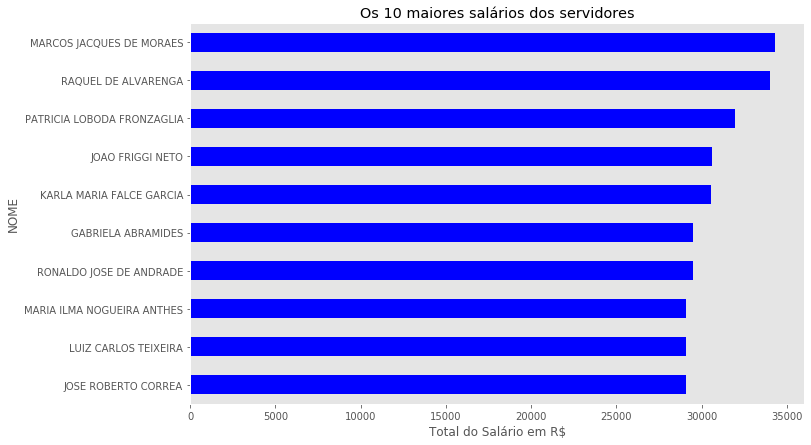

In [8]:
#Os 10 salários mais altos dos servidores

top10salarios = salarios[['NOME','TOTAL']].head(10).set_index('NOME').sort_values('TOTAL', ascending=True)
top10salarios.plot(kind='barh',figsize=(11,7),grid=False, color='blue', legend=False)

plt.title('Os 10 maiores salários dos servidores')
plt.xlabel('Total do Salário em R$')
plt.show()

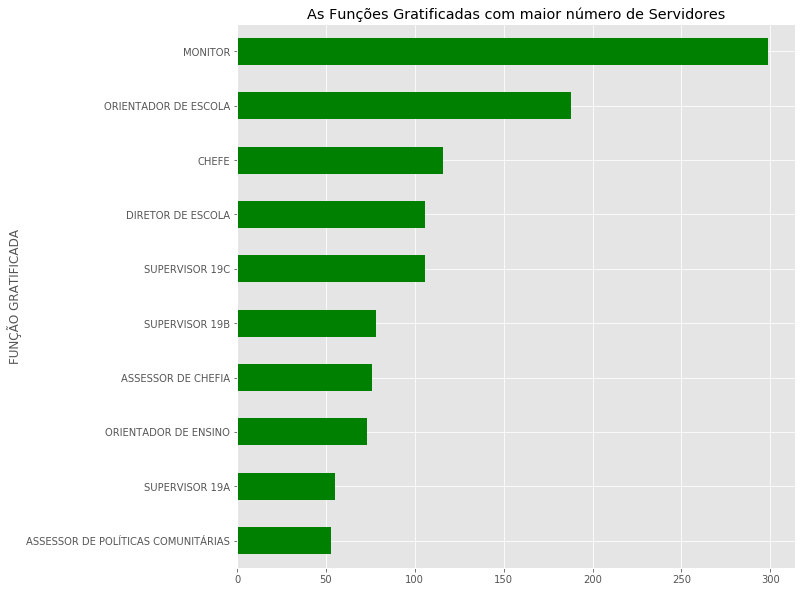

In [9]:
#Criação de um gráfico de barras com informações sobre as funções gratificadas com maior número de servidores.

salarios.groupby('FUNÇÃO GRATIFICADA').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10), color = 'green')

plt.title('As Funções Gratificadas com maior número de Servidores')
plt.show()

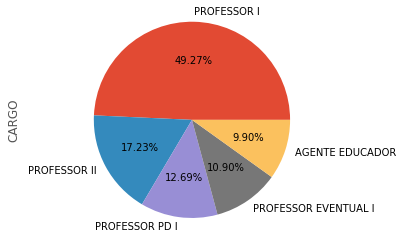

In [10]:
# Gráfico de Pizza com o percentual dos cargos em relação a qtd de servidores.

salarios.CARGO.value_counts().head(5).plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')  # Para deixar o gráfico redondo
plt.show()

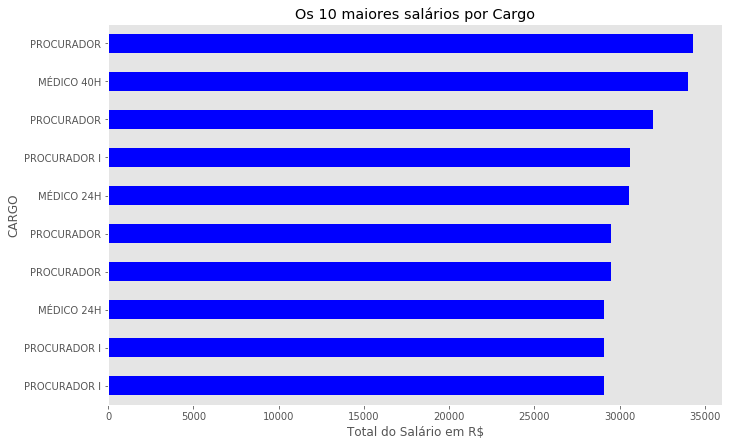

In [13]:
#Os 10 cargos com maior salário

top10salariosCargos = salarios[['CARGO','TOTAL']].head(10).set_index('CARGO').sort_values('TOTAL', ascending=True)
top10salariosCargos.plot(kind='barh',figsize=(11,7),grid=False, color='blue', legend=False)

plt.title('Os 10 maiores salários por Cargo')
plt.xlabel('Total do Salário em R$')
plt.show()